<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Cakra !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Cakra ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Cakra dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Konten <a id='back'></a>

* [Deskripsi Proyek](#intro)

       
* [Tahap 1.Inisialisasi Data](#data_initialization)


* [Tahap 2. Pra - Pemrosesan Data](#data_preprocessings)
    
  * [2.1 Cek data terduplikat dan data nul](#data_explore) 
  
  * [2.2 Lihat nilai fitur rata-ratanya dalam dua kelompok, yaitu untuk mereka yang keluar(churn) dan untuk mereka yang tiggal](#churn_mean)  
  * [2.3 Buat histogram dan distribusi fitur untuk mereka yang keluar (churn) serta mereka yang tinggal](#churn_histogram)
  
  * [2.4 Buat matriks korelasi dan tampilkan hasilnya.](#correlation_matrix) 
    
 
* [Tahap 3. Membangun model untuk memprediksi churn pengguna](#churn_prediction)
  
  * [3.1 Bagi datanya menjadi train set dan validation set menggunakan fungsi train_test_split()](#train_function)
  
  * [3.2 Latih model pada train set dengan dua metode yaitu regresi logistik dan random forest](#train_method)
  
  
* [Tahap 4. Membuat klaster pengguna](#users_cluster)
 
  * [4.1 Standardisasi Data dan Estimasi Jumlah Klaster dengan Dendrogram](#dendogram)

  * [4.2 Pengklasteran K-Means (n=5) dan Analisis Fitur Klaster: Menemukan Pola Menarik](#k_mean)

  * [4.3 Buat grafik distribusi fitur untuk setiap klaster. Apa kamu memperhatikan sesuatu?](#graph_distribution)

  * [4.4 Hitung tingkat churn untuk setiap klaster (gunakan metode groupby()).󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀩󠀳󠀰 Apa klaster-klaster tersebut berbeda sehubungan dengan tingkat churn?󠀲󠀡󠀥󠀥󠀧󠀨󠀦󠀠󠀳󠀰 Klaster pelanggan mana yang cenderung akan pergi, dan mana yang akan tetap setia?](#churn_groupby)

   

* [Kesimpulan Umum](#conlusion)



# Deskripsi data <a id='intro'></a>
󠀰
Waralaba pusat kebugaran, Model Fitness, sedang merancang strategi retensi pelanggan berdasarkan data analitik. Salah satu tantangan utama adalah mengidentifikasi pelanggan yang mungkin berhenti berlangganan. Meskipun perhitungan tingkat churn berdasarkan tindakan langsung pelanggan dapat dilakukan, namun ada kemungkinan pelanggan berhenti tanpa pemberitahuan.

Indikator churn dapat bervariasi sesuai dengan bidang usaha. Sebagai contoh, untuk pusat kebugaran, seorang pelanggan dianggap "pergi" jika tidak mengunjungi pusat selama satu bulan. Namun, ini belum tentu berarti pelanggan benar-benar berhenti. Untuk menghadapi masalah ini, Model Fitness menerapkan digitalisasi profil pelanggan.

Tugas analisis data melibatkan:

* Memprediksi probabilitas churn untuk setiap pelanggan pada bulan berikutnya.

* Melakukan segmentasi pengguna untuk mengidentifikasi kelompok dominan dan mengeksplorasi fitur utama mereka.

* Menganalisis faktor yang paling memengaruhi churn.

* Memberikan kesimpulan dan rekomendasi untuk meningkatkan layanan pelanggan.

* Identifikasi kelompok yang perlu ditargetkan.

* Rekomendasi langkah-langkah konkret untuk mengurangi churn.

* Deskripsi pola interaksi pelanggan yang dapat ditemui.

Analisis ini bertujuan untuk meningkatkan keterlibatan pelanggan dan mengurangi churn melalui strategi retensi yang terarah.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 1.  Inisialisasi Data <a id='data_inilization'></a> 

In [ ]:
#Mengimpor Library 
import pandas as pd 
import numpy as np
import warnings

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Memuat Data dan mengecek data
path = r'C:/Users/cakra2/OneDrive/Desktop/TripleTen-Project-Sprint/PROJECT 12/DATASET/'

df = pd.read_csv(path+'gym_churn_us.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

󠀰Model Fitness menyediakan file CSV yang berisi data tingkat churn pelanggan untuk bulan tertentu dan informasi tentang bulan sebelumnya.󠀲󠀡󠀥󠀥󠀧󠀨󠀠󠀨󠀳󠀰 Dataset ini mencakup kolom-kolom berikut:
* 'Churn' — churn aktual untuk bulan terkait

* Kolom dataset saat ini:
* Data pengguna untuk bulan sebelumnya
   * 'gender'
   * 'Near_Location' — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
   * 'Partner' — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
   * Promo_friends — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
   * 'Phone' — apakah pengguna memberikan nomor telepon mereka
   * 'Age'
   * 'Lifetime' — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran


* Data dari log kunjungan dan pembelian, serta data terkait status keanggotaan saat ini
   
   * 'Contract_period' — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
   
   * 'Month_to_end_contract' — sisa bulan sebelum kontrak berakhir
   
   * 'Group_visits' — apakah pengguna mengambil bagian dalam sesi kelompok
   
   * 'Avg_class_frequency_total' — frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan
   
   * 'Avg_class_frequency_current_month' — frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan
   
   * 'Avg_additional_charges_total' — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.

In [ ]:
df.shape

(4000, 14)

In [ ]:
df.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
19,1,1,1,1,1,12,1,29,73.917546,11.0,14,1.141327,1.158455,0
1948,1,1,0,0,1,1,0,27,49.392879,1.0,2,1.205260,0.694552,1
3577,0,1,1,0,1,6,0,31,96.991483,6.0,6,1.551009,1.487026,0
1526,1,1,1,0,0,12,0,31,154.383343,12.0,4,3.658439,3.670784,0
2522,1,1,0,0,1,1,1,21,42.721502,1.0,1,2.507654,2.812503,1


In [ ]:
df['Churn'].value_counts(normalize=True)

0    0.73475
1    0.26525
Name: Churn, dtype: float64

In [ ]:
# Mengubah penamaan kolom menjadi Huruf Kecil
df.columns = df.columns.str.lower()
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


- Dataset terdiri dari 4000 entri dan 14 kolom meliputi informasi seperti gender, lokasi, kontrak, kunjungan kelompok, usia, dan lainnya.

- Kolom "Churn" menunjukkan apakah pelanggan berhenti berlangganan.

- tingkat churn sekitar 26.5%, sedangkan 73.5% pelanggan tetap berlangganan.

- Nama kolom telah diubah menjadi huruf kecil untuk konsistensi.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.  Pra - Pemrosesan Data  <a id='data_preprocessing'></a> 

## 2.1 Cek data terduplikat dan data null  <a id='data_explore'></a> 

* Perhatikan dataset yang tersedia, apa ada fitur yang hilang?󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀠󠀳󠀰 Pelajari nilai rata-rata dan standar deviasinya (gunakan metode describe()).󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀡󠀳

In [ ]:
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

- Tidak ada data maupun fitur yang hilang dari pengecekan diatas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [ ]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Gender:
    
    - Rata-rata: 0.51, Std Dev: 0.50
    
    - Kesimpulan: Distribusi gender hampir seimbang, sedikit lebih banyak pria (1).

- Near Location:

    - Rata-rata: 0.85, Std Dev: 0.36
    
    - Kesimpulan: Mayoritas dekat dengan gym, variasi signifikan.

- Partner:
    
    - Rata-rata: 0.49, Std Dev: 0.50
    
    - Kesimpulan: Distribusi partner cukup seimbang.

- Promo Friends:
    
    - Rata-rata: 0.31, Std Dev: 0.46
    
    - Kesimpulan: Mayoritas tanpa promo teman.

- Phone:
    
    - Rata-rata: 0.90, Std Dev: 0.30
    
    - Kesimpulan: Hampir semua memberikan nomor telepon.

- Contract Period:
     - Rata-rata: 4.68, Std Dev: 4.55
   
     - Kesimpulan: Masa kontrak rata-rata 4.68 bulan, variasi tinggi.

- Group Visits:
     - Rata-rata: 0.41, Std Dev: 0.49
   
     - Kesimpulan: Mayoritas tidak ikut kunjungan kelompok.

- Age:
     - Rata-rata: 29.18, Std Dev: 3.26
   
     - Kesimpulan: Rata-rata usia 29.18 tahun, variasi rendah.

- Avg Additional Charges Total:

     - Rata-rata: 146.94, Std Dev: 96.36
   
     - Kesimpulan: Biaya tambahan rata-rata 146.94, variasi tinggi.

- Month to End Contract:

     - Rata-rata: 4.32, Std Dev: 4.19
   
     - Kesimpulan: Waktu kontrak rata-rata 4.32 bulan, variasi tinggi.

- Lifetime:

     - Rata-rata: 3.72, Std Dev: 3.75
   
     - Kesimpulan: Masa keanggotaan rata-rata 3.72 bulan, variasi tinggi.

- Avg Class Frequency Total:
     - Rata-rata: 1.88, Std Dev: 0.97

     - Kesimpulan: Frekuensi kunjungan rata-rata 1.88 kali, variasi tinggi.

- Avg Class Frequency Current Month:

     - Rata-rata: 1.77, Std Dev: 1.05

     - Kesimpulan: Frekuensi kunjungan bulan ini 1.77 kali, variasi tinggi.

- Churn:
     - Rata-rata: 0.27, Std Dev: 0.44

     - Kesimpulan: Tingkat churn rata-rata 0.27, variasi tinggi.

Wawasan Tambahan:

- Variasi tinggi pada fitur seperti Contract Period menunjukkan perlu adanya strategi pemasaran yang beragam.
- Standar deviasi yang tinggi pada Avg Additional Charges Total menunjukkan variasi biaya tambahan yang signifikan.
- Meskipun mayoritas memberikan nomor telepon, tidak dapat diasumsikan bahwa mereka semua aktif atau responsif melalui telepon.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.2 Lihat nilai fitur rata-ratanya dalam dua kelompok, yaitu untuk mereka yang keluar (churn) dan untuk mereka yang tinggal (gunakan metode groupby()).󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀢󠀳 <a id='churn_mean'></a> 

In [ ]:
# Rata-rata dan standar deviasi untuk kelompok churn dan tidak churn
churn_grouped = df.groupby('churn').mean().T
churn_grouped

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Tidak ada perbedaan signifikan dalam jenis kelamin antara pelanggan yang tinggal dan yang keluar. Proporsi pria dan wanita cukup serupa di kedua kelompok. Namun, terdapat perbedaan yang mencolok pada faktor lokasi. Pelanggan yang tinggal memiliki kecenderungan lebih tinggi untuk berada dekat dengan lokasi pusat kebugaran dibandingkan dengan pelanggan yang keluar. Selain itu, pelanggan yang tinggal lebih cenderung menjadi karyawan perusahaan mitra dan menggunakan promo kode dari teman saat pembelian pertama.

Meskipun tidak ada perbedaan signifikan dalam keberadaan nomor telepon terdaftar, pelanggan yang tinggal memiliki periode kontrak yang lebih lama, lebih aktif dalam sesi kelompok, memiliki rata-rata usia yang lebih tinggi, dan mengeluarkan lebih banyak uang untuk layanan tambahan.

Selain itu, pelanggan yang tinggal memiliki sisa waktu kontrak yang lebih panjang, telah menjadi anggota lebih lama, dan memiliki frekuensi kunjungan ke kelas yang lebih tinggi baik secara total maupun bulan ini. Semua faktor ini menunjukkan bahwa pelanggan yang memiliki keterlibatan yang lebih tinggi dengan pusat kebugaran, baik dari segi waktu keanggotaan maupun partisipasi dalam kegiatan kelompok, cenderung lebih bertahan dan kurang mungkin keluar (churn).

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.3 Buat histogram dan distribusi fitur untuk mereka yang keluar (churn) serta mereka yang tinggal.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀣󠀳 <a id='churn_histogram'></a> 


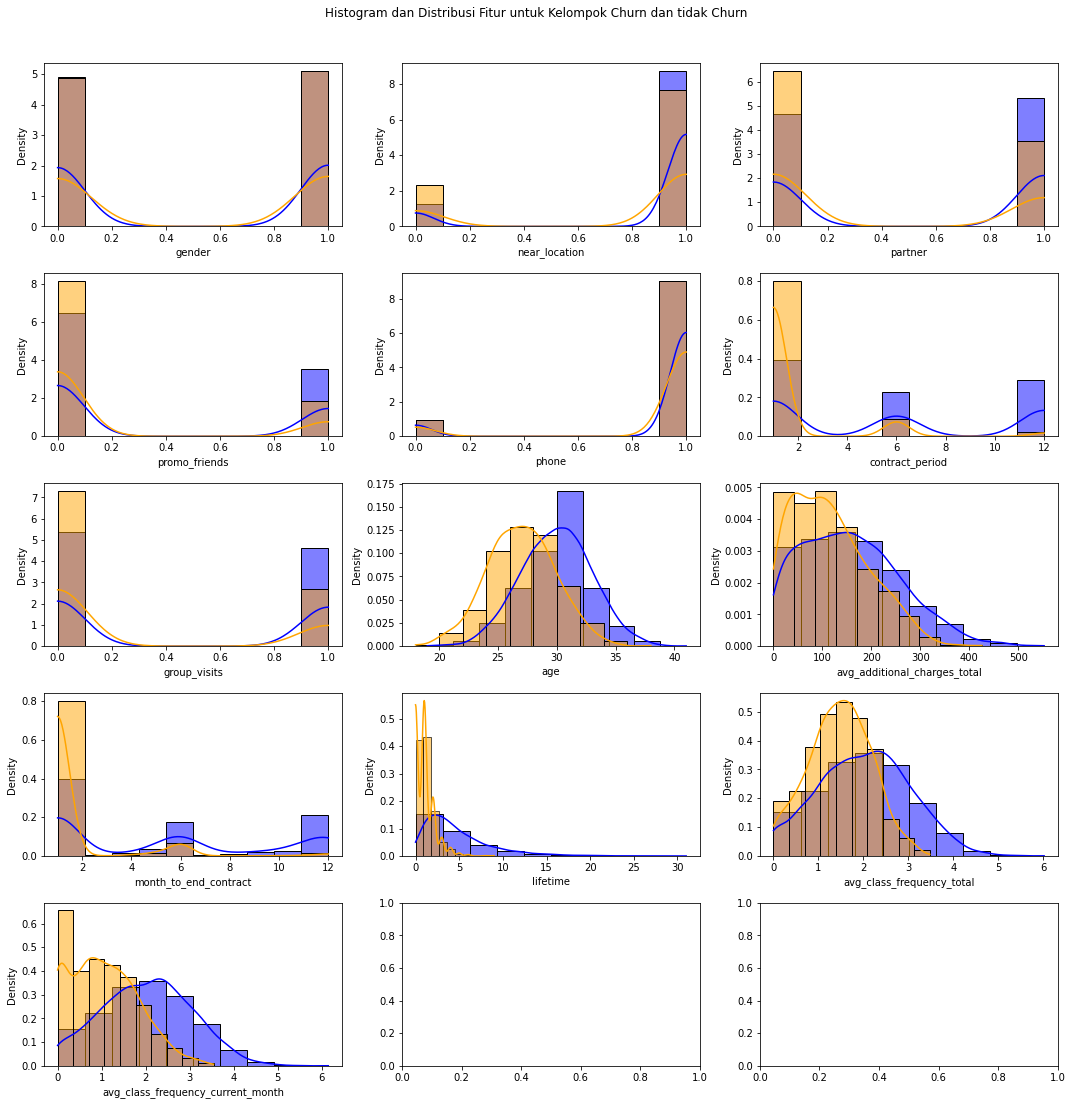

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.suptitle("Histogram dan Distribusi Fitur untuk Kelompok Churn dan tidak Churn", y=1.02)

for i, column in enumerate(df.columns[:-1]):
    # Plot histogram for 'not churn' with density normalization
    sns.histplot(data=df[df['churn'] == 0], x=column, kde=True, bins=10, color='blue', stat='density', ax=axes[i//3, i%3])

    # Plot histogram for 'churn' with density normalization
    sns.histplot(data=df[df['churn'] == 1], x=column, kde=True, bins=10, color='orange', stat='density', ax=axes[i//3, i%3])

# Adjust layout
plt.tight_layout()
plt.show()


- Jenis kelamin tidak menjadi faktor penentu yang signifikan untuk perbedaan churn. Proporsi pria dan wanita relatif seragam di kedua kelompok.


- Lokasi memiliki pengaruh pada churn, dengan pelanggan yang tinggal cenderung lebih dekat dengan pusat kebugaran.


- Keanggotaan sebagai karyawan perusahaan mitra cenderung lebih tinggi di antara pelanggan yang tinggal.


- Penggunaan promo kode dari teman saat pembelian pertama lebih umum terjadi pada pelanggan yang tinggal.


- Keberadaan nomor telepon terdaftar relatif seragam di antara kedua kelompok.


- Pelanggan yang tinggal memiliki periode kontrak yang lebih panjang, sisa waktu kontrak yang lebih lama, dan telah menjadi anggota lebih lama.


- Partisipasi aktif dalam sesi kelompok lebih umum terjadi pada pelanggan yang tinggal.


- Usia pelanggan yang tinggal cenderung lebih tinggi dibandingkan dengan pelanggan yang keluar.


- Total biaya tambahan yang dieluarkan oleh pelanggan yang tinggal lebih tinggi.


- Frekuensi kunjungan ke kelas secara total dan bulan ini lebih tinggi di kalangan pelanggan yang tinggal.








In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.4 Buat matriks korelasi dan tampilkan hasilnya. <a id='correlation_matrix'></a> 

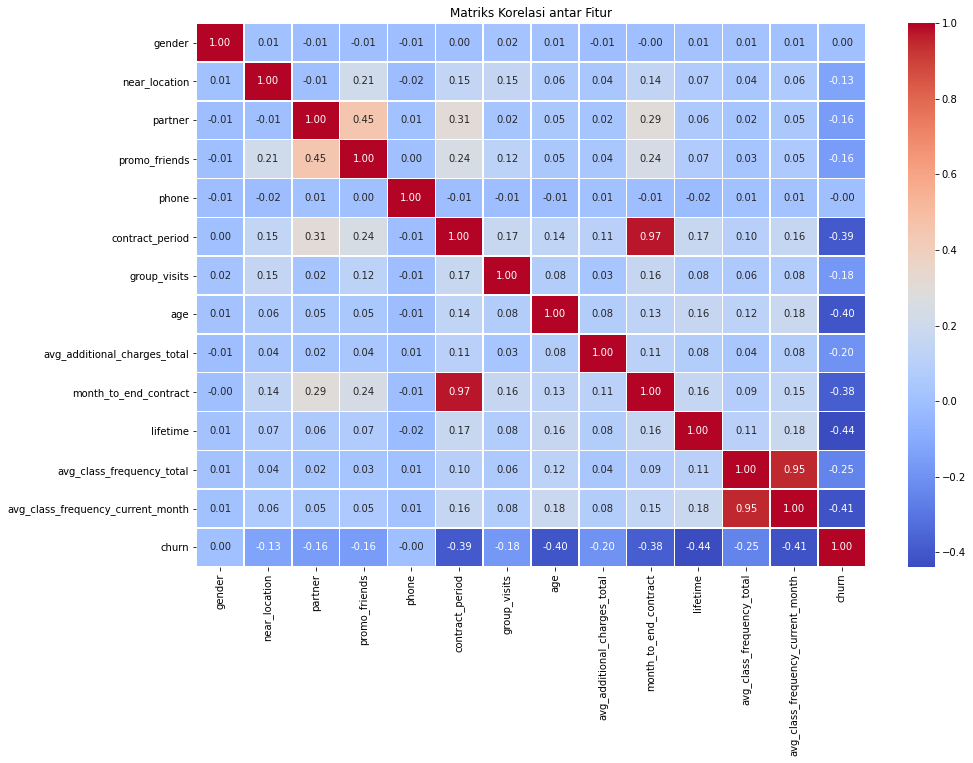

In [ ]:
# Matriks korelasi

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriks Korelasi antar Fitur")
plt.show()

Berdasarkan analisis matriks korelasi, Terlihat bahwa korelasi cenderung negatif sedang antara Churn dan beberapa fitur, yaitu:

- Contract Period: Semakin lama masa kontrak, semakin rendah kemungkinan churn.

- Age: Pelanggan dengan usia yang lebih tua cenderung memiliki tingkat churn yang lebih rendah.

- Month to End Contract: Semakin lama sisa waktu kontrak, semakin rendah kemungkinan churn.

- Lifetime: Pelanggan dengan masa keanggotaan yang lebih lama memiliki tingkat churn yang lebih rendah.

- Average Class Frequency for the Current Month: Semakin tinggi frekuensi kunjungan kelas dalam bulan berjalan, semakin rendah kemungkinan churn.

Korelasi negatif ini mengindikasikan bahwa pelanggan dengan kontrak lebih lama, usia lebih tua, sisa waktu kontrak lebih panjang, masa keanggotaan lebih lama, dan frekuensi kunjungan kelas lebih tinggi cenderung memiliki tingkat churn yang lebih rendah.

Perlu dicatat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat, dan analisis lebih lanjut diperlukan untuk memahami hubungan sebab-akibat antara fitur-fitur ini dan churn.






<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀥󠀳󠀰 Membangun model untuk memprediksi churn pengguna <a id='churn_prediction'></a> 
󠀰
Buat model klasifikasi biner untuk pelanggan, di mana fitur targetnya adalah pengguna yang akan keluar bulan depan.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀧󠀳

## 3.1 Bagi datanya menjadi train set dan validation set menggunakan fungsi train_test_split().󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀨󠀳 <a id='train_function'></a> 

In [ ]:
X = df.drop('churn', axis = 1)
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 13)
(800, 13)
(3200,)
(800,)


## 3.2 Latih model pada train set dengan dua metode berikut:
   * regresi logistik
   * random forest
   
Evaluasi accuracy, precision, dan recall untuk kedua model menggunakan validation set.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀢󠀳󠀰 Gunakan metrik-metrik tersebut untuk membandingkan model.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀣󠀳󠀰 Model mana yang memberikan hasil terbaik?   <a id='train_nethod'></a>

In [ ]:
# fungsi print untuk regresi logistik
def print_classification_metrics(model_name, y_true, y_pred, y_proba):

    print('\tAccuracy score: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    print()


In [ ]:
# Regresi logistik
logistic_model = LogisticRegression( random_state=0,solver='liblinear')
logistic_model.fit(X_train, y_train)


# memperoleh probabilitas bahwa suatu objek merupakan bagian dari kelas tertentu
y_proba_lr = logistic_model.predict_proba(X_test)[:, 1]
y_pred_lr = logistic_model.predict(X_test)
y_pred_train_lr = logistic_model.predict(X_train)


# Example usage:

print_classification_metrics('Logistic Regression resukts', y_test, y_pred_lr, y_proba_lr)

	Accuracy score: 0.93
	Precision: 0.86
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97



In [ ]:
# fungsi print untuk random forest
def print_classification_metric(model_name, y_true,y_pred_rf,y_proba_rff):

    print('\tAccuracy score: {:.2f}'.format(accuracy_score(y_true, y_pred_rf)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred_rf)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred_rf)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred_rf)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba_rf)))
    print()

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=0, )
rf_model.fit(X_train, y_train)


# memperoleh probabilitas bahwa suatu objek merupakan bagian dari kelas tertentu
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)


# Example usage:

print_classification_metric('RandomForestClassifier resukts', y_test, y_pred_rf, y_proba_lr)

	Accuracy score: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97




- Kedua model klasifikasi memberikan hasil yang baik dengan akurasi yang tinggi, berkisar antara 92% hingga 93%.

- Model Regresi Logistik memiliki presisi yang sedikit lebih tinggi, menunjukkan kemampuan untuk mengidentifikasi dengan baik positif sejati (pelanggan yang benar-benar akan keluar).

- Model Random Forest memiliki recall yang sedikit lebih tinggi, menunjukkan kemampuan untuk dengan baik membedakan antara kelas positif dan negatif secara keseluruhan.

Pembandingan :


- Kedua model secara umum memberikan hasil yang serupa, tetapi Regresi Logistik lebih unggul dalam presisi, sementara Random Forest lebih baik dalam recall.

- Jika fokus lebih pada menghindari kesalahan prediksi positif palsu, maka Regresi Logistik mungkin menjadi pilihan terbaik.

- Jika fokus lebih pada menghindari kesalahan prediksi negatif palsu, maka Random Forest dapat dianggap sebagai pilihan yang lebih baik. Pada akhirnya, pilihan antara kedua model tergantung pada tujuan bisnis dan preferensi untuk mengoptimalkan metrik tertentu

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 4.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀦󠀳󠀰 Membuat klaster pengguna <a id='users_cluster'></a>

 ## 4.1 Standardisasi Data dan Estimasi Jumlah Klaster dengan Dendrogram <a id='dendogram'></a>

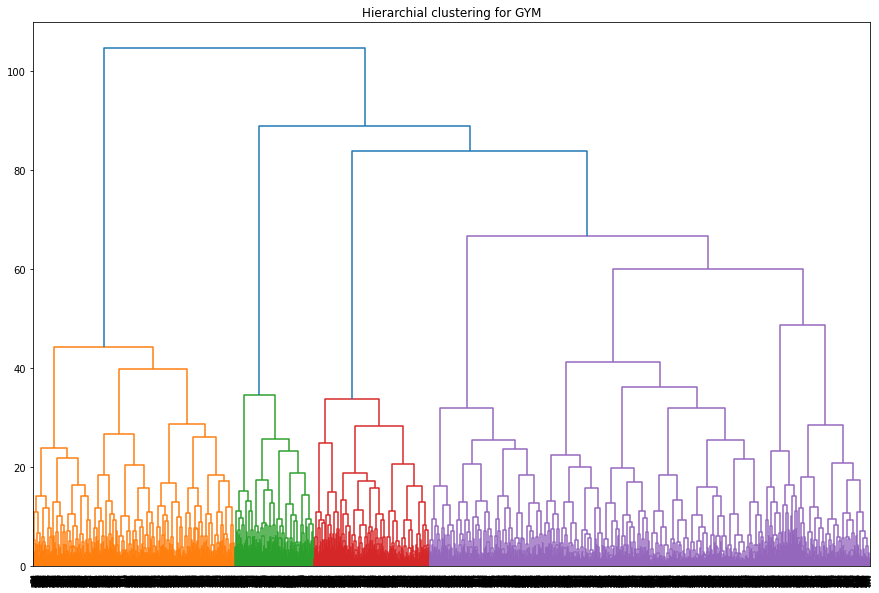

In [ ]:
sc = StandardScaler()
x_sc = sc.fit_transform(df.drop(columns = ['churn']))

linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked,orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()


- Proses standardisasi data telah dilakukan untuk memastikan keseragaman skala pada semua fitur.

- Dendrogram dihasilkan menggunakan metode hierarki klaster (ward) dan memberikan gambaran visual tentang struktur klaster pada data.

- Dalam dendrogram, garis horizontal merepresentasikan penggabungan klaster, dan tingginya garis tersebut menunjukkan jarak antara klaster yang digabung.

- Pemilihan jumlah klaster dapat dilakukan dengan memperhatikan titik pemotongan (cut-off point) di mana garis horizontal melintasi garis vertikal. Titik ini mencerminkan seberapa jauh klaster yang digabung.

- Dalam kasus ini, kita dapat mempertimbangkan pemilihan 3 klaster berdasarkan titik pemotongan yang signifikan pada tingkat jarak tertentu.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.2 Pengklasteran K-Means (n=5) dan Analisis Fitur Klaster: Menemukan Pola Menarik <a id='k_mean'></a>

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X)

In [ ]:
labels

array([3, 0, 0, ..., 0, 3, 1], dtype=int32)

In [ ]:
df['cluster_km'] = labels
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611
2,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
3,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
4,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470


In [ ]:
df['cluster_km'].value_counts().sort_index()

0    1029
1     962
2     271
3    1032
4     706
Name: cluster_km, dtype: int64

In [ ]:
# Group by 'cluster_km' and calculate the mean of 'churn'
churn_rate = df.groupby('cluster_km')['churn'].mean().reset_index(name='churn_rate')
# Convert 'churn_rate' to percentage format
churn_rate['churn_rate, %'] = (churn_rate['churn_rate'] * 100).map('{:.2f}%'.format)
churn_rate = churn_rate.reset_index(drop=True)
churn_rate

,cluster_km,churn_rate,"churn_rate, %"
0,0,0.334305,33.43%
1,1,0.226611,22.66%
2,2,0.044280,4.43%
3,3,0.349806,34.98%
4,4,0.178470,17.85%


1. Pembagian Klaster:


- Model K-Means dengan 5 klaster telah diterapkan pada data.

- Jumlah pengguna dalam masing-masing klaster tidak seragam, dengan klaster 2 memiliki jumlah pengguna yang paling sedikit dan klaster 0 dan 3 memiliki jumlah pengguna yang cukup besar.

2. Analisis Fitur Klaster:


- Fitur Gender:

Proporsi gender cenderung seragam di semua klaster, menunjukkan distribusi pria dan wanita yang relatif seimbang.

- Fitur Near Location:

Hampir semua klaster memiliki tingkat tinggi untuk berada dekat dengan lokasi pusat kebugaran.

- Fitur Partner dan Promo Friends:
Klaster 2 memiliki tingkat keanggotaan mitra dan penggunaan promo kode teman yang lebih rendah dibandingkan dengan klaster lainnya.

- Fitur Contract Period dan Month to End Contract:

Klaster 2 memiliki periode kontrak dan sisa waktu kontrak yang lebih lama dibandingkan dengan klaster lainnya.

- Fitur Group Visits:

Secara umum, penggunaan sesi kelompok tidak bervariasi secara signifikan di antara klaster.

- Fitur Age:

Rata-rata usia pelanggan di semua klaster relatif seragam.

- Fitur Avg Additional Charges Total:

Klaster 2 memiliki total biaya tambahan yang lebih rendah dibandingkan dengan klaster lainnya.

- Fitur Lifetime:

Klaster 2 memiliki masa keanggotaan yang lebih pendek dibandingkan dengan klaster lainnya.

- Fitur Avg Class Frequency Total dan Avg Class Frequency Current Month:

Klaster 2 cenderung memiliki frekuensi kunjungan ke kelas yang lebih rendah dibandingkan dengan klaster lainnya.

3. Churn Rate:


- Terdapat variasi yang signifikan dalam tingkat churn antara klaster.

- Klaster 2 menonjol dengan tingkat churn yang sangat rendah (4.43%), sementara klaster 1 memiliki tingkat churn terendah (22.66%).

- Klaster 0, 3, dan 4 memiliki tingkat churn yang lebih tinggi, dengan klaster 3 mencapai 34.98%.

Pola Menarik:


- Klaster 2 dapat dianggap sebagai "Pengguna Setia" dengan tingkat churn yang sangat rendah, kontrak jangka panjang, dan total biaya tambahan yang rendah.

- Klaster 1, meskipun memiliki tingkat churn rendah, memiliki kecenderungan lebih tinggi untuk menjadi mitra dan menggunakan promo kode teman.

- Klaster 3 memiliki tingkat churn tertinggi dan mungkin memerlukan perhatian lebih untuk memahami faktor-faktor penyebab churn.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.3 Buat grafik distribusi fitur untuk setiap klaster.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀧󠀳󠀰 Apa kamu memperhatikan sesuatu? <a id='graph_distribution'></a>

<Figure size 576x432 with 0 Axes>

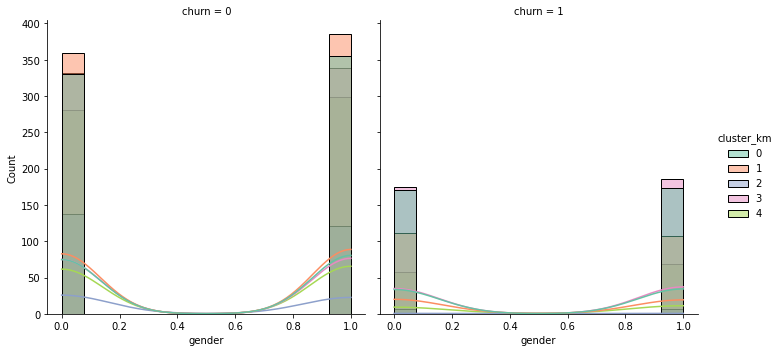

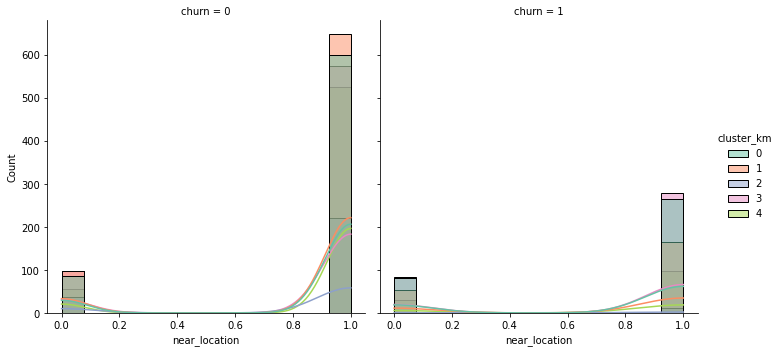

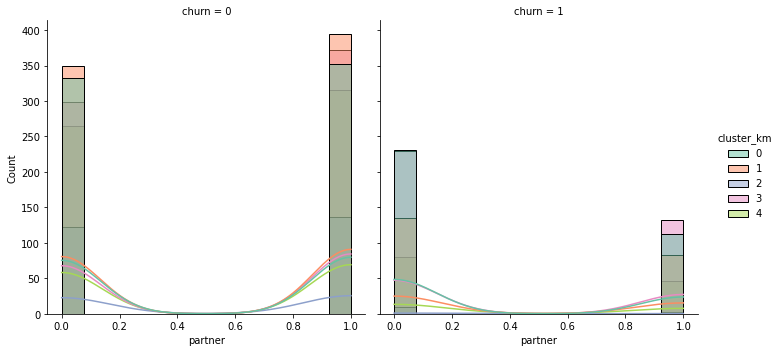

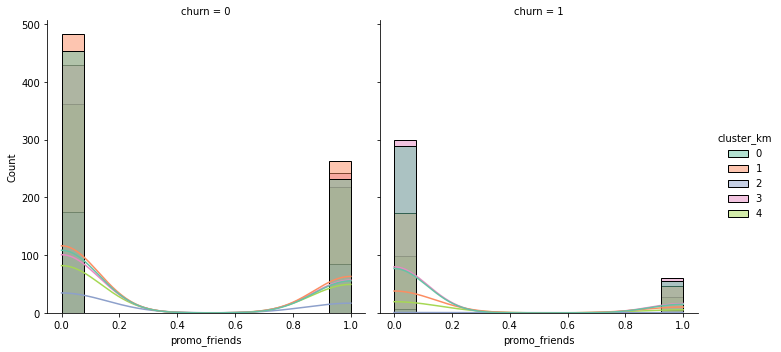

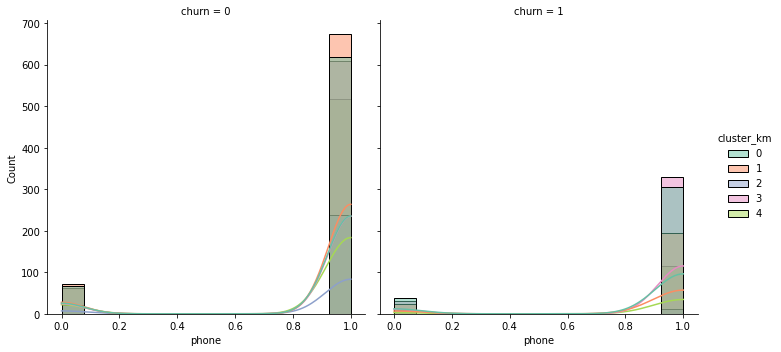

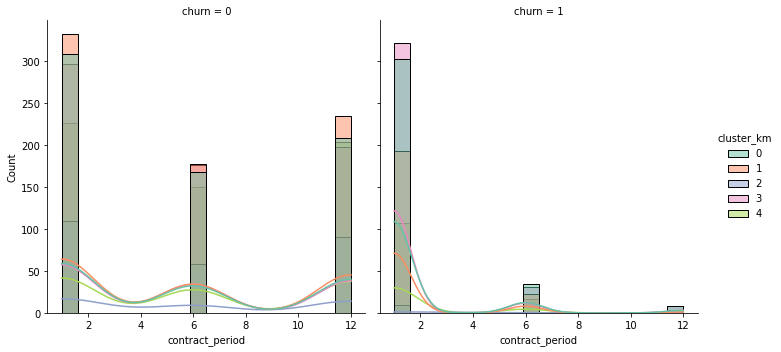

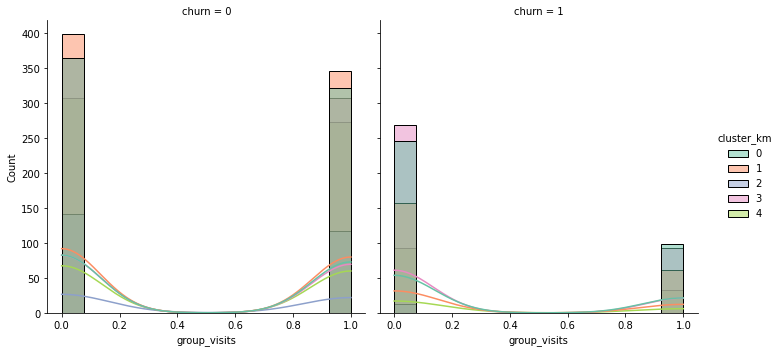

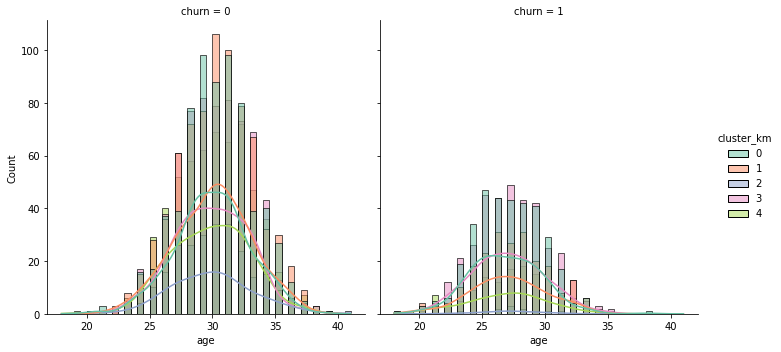

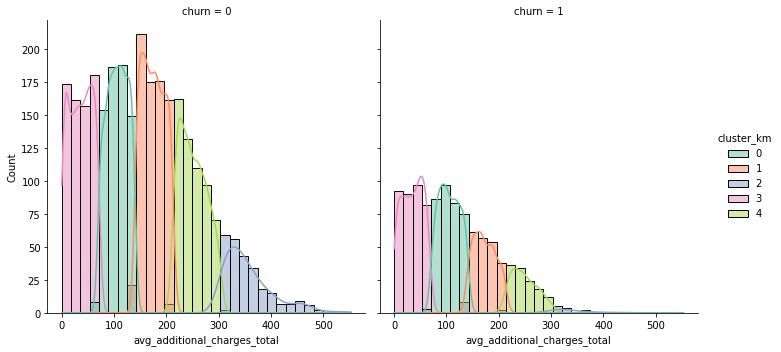

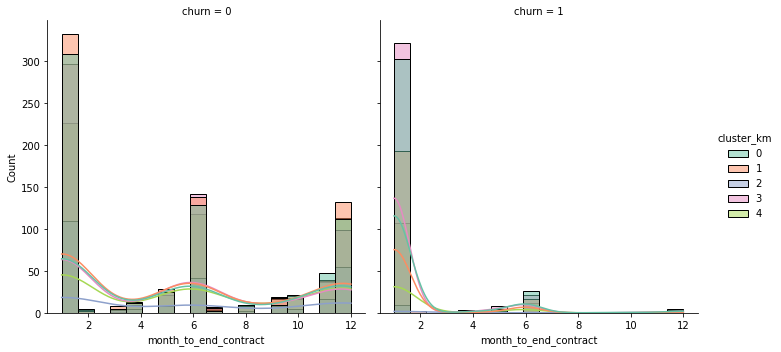

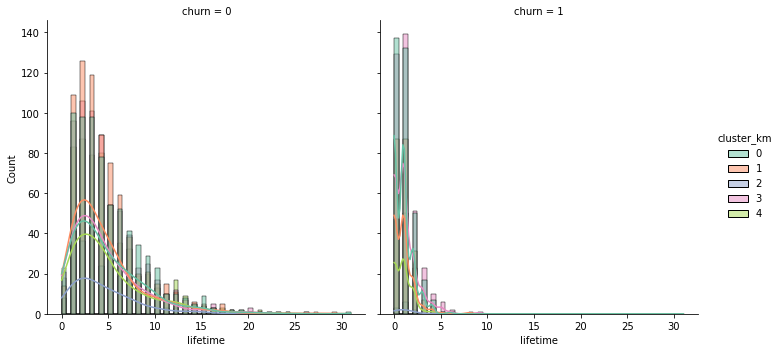

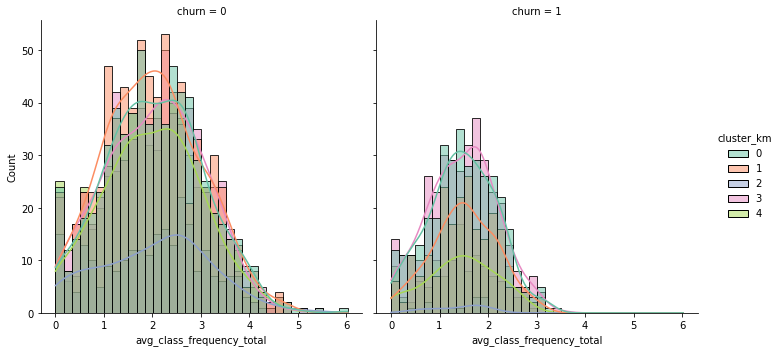

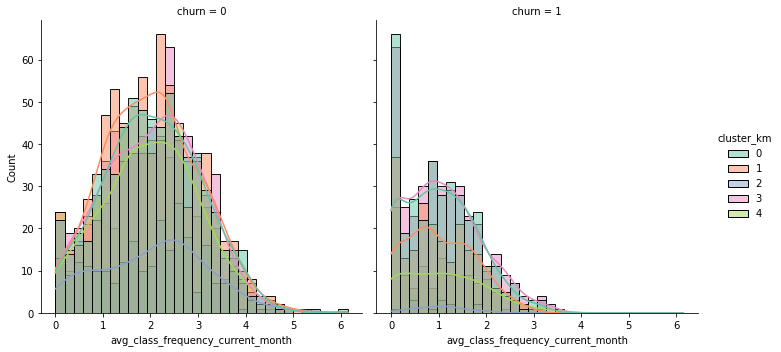

In [ ]:
# Suppress Seaborn warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define a color palette for clusters
cluster_palette = sns.color_palette('Set2', n_colors=df['cluster_km'].nunique())

plt.figure(figsize=(8, 6))

for column in df.drop(['churn', 'cluster_km'], axis=1).columns:
    if df[column].nunique() > 1:
        sns.displot(
            data=df,
            x=column,
            col='churn',
            hue='cluster_km',
            kde=True,
            palette=cluster_palette
        )
        plt.show()
    else:
        print(f"Skipped {column} due to zero variance.")


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.4  Hitung tingkat churn untuk setiap klaster (gunakan metode groupby()).󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀩󠀳󠀰 Apa klaster-klaster tersebut berbeda sehubungan dengan tingkat churn?󠀲󠀡󠀥󠀥󠀧󠀨󠀦󠀠󠀳󠀰 Klaster pelanggan mana yang cenderung akan pergi, dan mana yang akan tetap setia? <a id='churn_groupby'></a>

In [ ]:
df.groupby(['cluster_km']).mean()['churn']

cluster_km
0    0.334305
1    0.226611
2    0.044280
3    0.349806
4    0.178470
Name: churn, dtype: float64

Pengamatan:

- Umum:
Distribusi fitur dalam setiap klaster terlihat cukup berbeda antara pengguna yang churn dan tidak churn.

- Gender:
Tidak ada perbedaan signifikan dalam distribusi gender di antara klaster.

- Near Location:
Mayoritas pengguna dalam setiap klaster berada dekat dengan lokasi pusat kebugaran.

- Age:
Klaster 2 cenderung memiliki distribusi usia yang lebih muda.

- Contract Period dan Lifetime:
Klaster 2 memiliki kecenderungan kontrak jangka pendek dan masa keanggotaan yang lebih pendek.

Tingkat Churn:

- Klaster 2 menonjol dengan tingkat churn yang sangat rendah (4.43%).

- Klaster 1 memiliki tingkat churn yang rendah (22.66%), sementara Klaster 3 memiliki tingkat churn tertinggi (34.98%).

Analisis:

- Klaster yang Cenderung Pergi (Churn):

   - Klaster 3 cenderung memiliki tingkat churn yang tinggi.

   - Klaster 0 dan Klaster 2 juga memiliki tingkat churn yang relatif tinggi.
- Klaster yang Cenderung Tetap Setia:

   - Klaster 2 menjadi sorotan dengan tingkat churn yang sangat rendah dan dapat dianggap sebagai kelompok pelanggan setia.

   - Klaster 1 juga memiliki tingkat churn yang rendah.

Rekomendasi:


- Perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor penyebab tingkat churn yang tinggi pada Klaster 3.

- Klaster 2 dapat menjadi fokus untuk strategi retensi lebih lanjut, mengingat tingkat churn yang sangat rendah.

- Penyesuaian strategi pemasaran atau penawaran dapat dipertimbangkan untuk meningkatkan retensi pada Klaster 1.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Langkah 5.󠀲󠀡󠀥󠀥󠀧󠀨󠀦󠀢󠀳󠀰 Merumuskan kesimpulan dan rekomendasi sederhana untuk bekerja dengan pelanggan
󠀰
Tarik kesimpulan serta rumuskan rekomendasi terkait strategi interaksi dan retensi pelanggan.󠀲󠀡󠀥󠀥󠀧󠀨󠀦󠀤󠀳
󠀰Kamu tidak perlu kok menjelaskan semuanya secara mendetail.󠀲󠀡󠀥󠀥󠀧󠀨󠀦󠀥󠀳󠀰 Cukup jelaskan tiga atau empat prinsip yang paling penting, beserta contoh penerapannya dalam bentuk langkah-langkah pemasaran tertentu.

Berdasarkan eksplorasi data yang dilakukan, dapat disimpulkan bahwa Model Fitness menghadapi tantangan signifikan terkait churn pelanggan. Tingkat churn rata-rata sebesar 27% menandakan perlunya penerapan strategi retensi pelanggan yang efektif.

1. Pengaruh Faktor-faktor Terhadap Churn:

   - Tidak terdapat perbedaan signifikan dalam tingkat churn antara gender pelanggan.
   - Pelanggan yang tinggal lebih jauh dari pusat kebugaran, bukan karyawan perusahaan mitra, dan tidak mendaftar melalui promo "ajak teman" memiliki kemungkinan lebih tinggi untuk churn.
   - Rekomendasi dari teman, partisipasi dalam sesi kelompok, dan keanggotaan mitra berkorelasi dengan tingkat churn yang lebih rendah.
   

2. Faktor-faktor yang Berpengaruh pada Churn:

   - Pelanggan yang lebih muda cenderung memiliki tingkat churn yang lebih tinggi.
   - Masa keanggotaan yang lebih pendek, frekuensi kunjungan yang lebih rendah, dan total biaya tambahan yang lebih tinggi terkait dengan pelanggan yang cenderung churn.

3. Rekomendasi untuk Mengurangi Churn:

   - Perlu fokus pada peningkatan keterlibatan pelanggan, terutama bagi mereka yang tinggal lebih jauh dan bukan karyawan mitra.
   - Kampanye pemasaran yang ditargetkan dan insentif untuk referensi pelanggan serta partisipasi dalam sesi kelompok dapat 
   - mengurangi tingkat churn.
   - Strategi retensi yang disesuaikan dengan preferensi dan kebutuhan setiap segmen pelanggan dapat menjadi pendekatan yang efektif.

4. Pemanfaatan Model Pengelompokan Pelanggan:
   - Model pengelompokan pelanggan membantu memahami karakteristik dan perilaku pelanggan secara lebih mendalam.
   - Penggunaan model ini memungkinkan pengelompokan pelanggan berdasarkan preferensi dan kebutuhan, memungkinkan pengembangan kampanye pemasaran yang lebih personal.
   - Melalui pendekatan ini, Model Fitness dapat meningkatkan kepuasan pelanggan, meningkatkan pendapatan, dan membangun reputasi merek yang lebih kuat.

Dengan mengambil langkah-langkah ini, diharapkan Model Fitness dapat mengurangi tingkat churn, meningkatkan retensi pelanggan, dan mencapai kesuksesan dalam jangka panjang.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>